In [1]:
from task_offloading_moo.pymoo.algorithms.puma_optimizer import PumaOptimizer
from task_offloading_moo.pymoo.problem import TaskOffloadingProblem
from task_offloading_moo.pymoo.operators.repair import TaskOffloadingRepair
from task_offloading_moo.pymoo.operators.sampling import TaskOffloadingSampling
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

In [2]:
pop_size = 100
n_max_iters = 50

num_cloud_machines = 30
num_fog_machines = 20
num_tasks = 500

algorithm = PumaOptimizer(repair=TaskOffloadingRepair(),
                      pop_size=pop_size,
                      sampling=TaskOffloadingSampling(),
                      n_max_iters=n_max_iters,
                      archive_size=100,
                      save_history=True,
                      )

problem = TaskOffloadingProblem(num_cloud_machines, num_fog_machines, num_tasks)

In [3]:
res = minimize(problem,
           algorithm,
           seed=1,
           verbose=True)

n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      100 |      7 |             - |             -
     2 |      200 |    100 |  2.187710E+01 |         ideal
     3 |      200 |    100 |  0.000000E+00 |             f
     4 |      200 |    100 |  0.000000E+00 |             f
     5 |      200 |    100 |  0.000000E+00 |             f
     6 |      200 |    100 |  0.000000E+00 |             f
     7 |      200 |    100 |  0.000000E+00 |             f
     8 |      200 |    100 |  0.000000E+00 |             f
     9 |      200 |    100 |  0.000000E+00 |             f
    10 |      200 |    100 |  0.000000E+00 |             f
    11 |      200 |    100 |  0.000000E+00 |             f
    12 |      200 |    100 |  0.000000E+00 |             f
    13 |      200 |    100 |  0.000000E+00 |             f
    14 |      200 |    100 |  0.000000E+00 |             f
    15 |      200 |    100 |  0.000000E+00 |             f
    16 |      200 |    100 |  0.000000E+00 |            

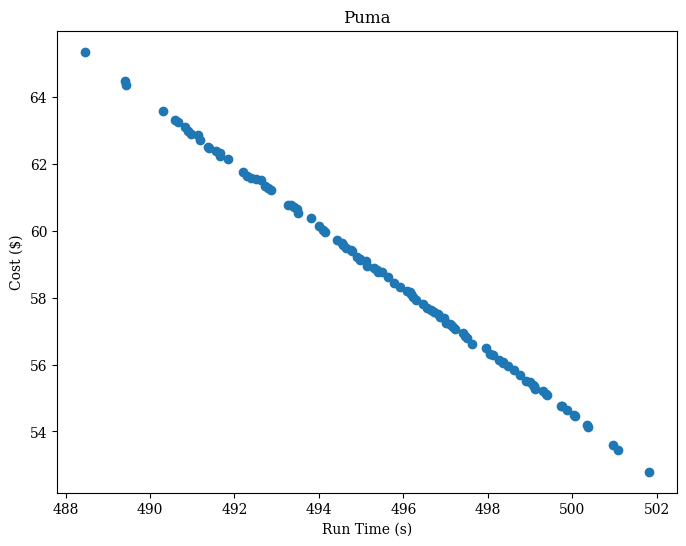

In [4]:
# print(f"Best population found:\n {res.X} \nwith F:\n{res.F}")

plot = Scatter(title="Puma")
plot.add(res.F)
plot.axis_labels = problem.dataset_generator.get_objective_names()
_ = plot.show()

In [5]:
# res.archive.get("F")

array([[488.462094  ,  65.36081011],
       [501.81444501,  52.79676791],
       [490.31766208,  63.5800634 ],
       [489.40012168,  64.47621546],
       [489.43585224,  64.35676558],
       [501.09580758,  53.46141345],
       [500.96363223,  53.61106109],
       [500.37268346,  54.14149524],
       [491.85334803,  62.15710048],
       [492.21340168,  61.77592348],
       [493.26528615,  60.77265381],
       [493.82480837,  60.37390738],
       [492.87644004,  61.2254011 ],
       [494.43249162,  59.72113975],
       [499.40992974,  55.09573364],
       [497.94866616,  56.49353894],
       [497.62993303,  56.60503791],
       [499.72541974,  54.75562958],
       [493.49941011,  60.53998757],
       [495.62951503,  58.61442855],
       [493.99913194,  60.14842335],
       [500.34412326,  54.20757772],
       [491.17665   ,  62.72453148],
       [494.13945171,  59.97135345],
       [500.06967406,  54.453678  ],
       [495.78794459,  58.44411841],
       [490.58091037,  63.3253816 ],
 

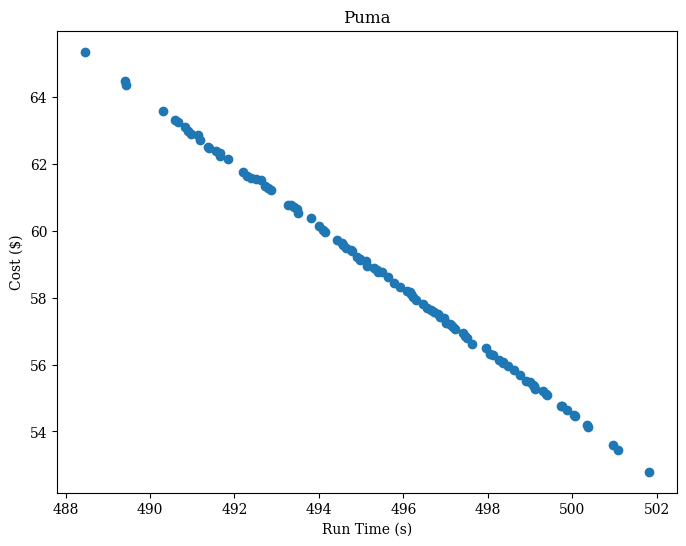

In [6]:
plot = Scatter(title="Puma")
plot.add(res.archive.get("F"))
plot.axis_labels = problem.dataset_generator.get_objective_names()
_ = plot.show()

In [8]:
from pyrecorder.recorder import Recorder
from pyrecorder.writers.video import Video
import os

out_path = os.path.join(os.path.dirname(os.getcwd()), "output")
os.makedirs(out_path, exist_ok=True)
with Recorder(Video(os.path.join(out_path, "video.mp4"))) as rec:

    # for each algorithm object in the history
    for entry in res.history:
        sc = Scatter(title=("Gen %s" % entry.n_gen))
        sc.add(entry.opt.get("F"))
        sc.add(entry.problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
        sc.do()

        # finally record the current visualization to the video
        rec.record()